In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

100%|██████████| 64.4M/64.4M [00:01<00:00, 56.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4


In [2]:
import os
import pickle
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
input_dir = path
categories = ['cats', 'dogs']
train_data = []
test_data = []
train_labels = []
test_labels = []

In [13]:
for category_idx, category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir, 'train', category)):
    train_img_path = os.path.join(input_dir, 'train', category, file)
    train_img = imread(train_img_path)
    train_img = resize(train_img, (150, 150,3))
    train_data.append(train_img.flatten())
    train_labels.append(category_idx)
  for file in os.listdir(os.path.join(input_dir, 'test', category)):
    test_img_path = os.path.join(input_dir, 'test', category, file)
    test_img = imread(test_img_path)
    test_img = resize(test_img, (15, 15,3))
    test_data.append(test_img.flatten())
    test_labels.append(category_idx)

In [19]:
test_data = []
test_labels = []

In [20]:
for category_idx, category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir, 'test', category)):
    test_img_path = os.path.join(input_dir, 'test', category, file)
    test_img = imread(test_img_path)
    test_img = resize(test_img, (150, 150,3))
    test_data.append(test_img.flatten())
    test_labels.append(category_idx)

In [21]:
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [15]:
print(test_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [22]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(557, 67500)
(140, 67500)
(557,)
(140,)


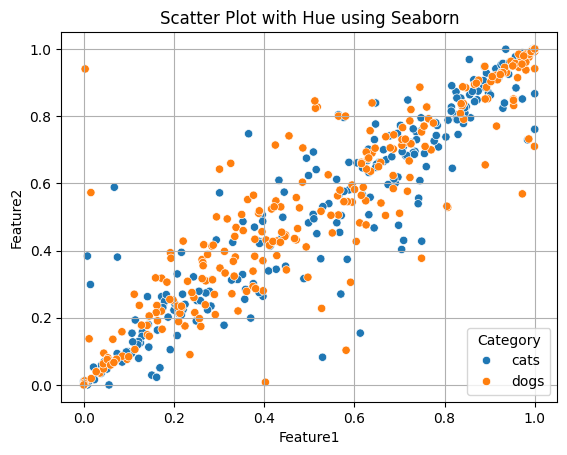

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   # Assuming train_data and train_labels are NumPy arrays
df = pd.DataFrame(train_data[:, :2], columns=['Feature1', 'Feature2'])  # Select first two features
df['Category'] = pd.Categorical.from_codes(train_labels, categories)  # Add category column
sns.scatterplot(x='Feature1', y='Feature2', hue='Category', data=df)
plt.title("Scatter Plot with Hue using Seaborn")
plt.grid(True)
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
classifier = SVC()
parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf']}]
grid_search = GridSearchCV(classifier, parameters)
grid_search.fit(train_data, train_labels)
best_estimator = grid_search.best_estimator_


In [23]:
y_prediction = best_estimator.predict(test_data)
score = accuracy_score(test_labels, y_prediction)
print('{}% of samples were correctly classified'.format(str(score * 100)))

65.71428571428571% of samples were correctly classified


In [24]:
grid_search.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [25]:
pickle.dump(best_estimator, open('/content/model.p', 'wb'))

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

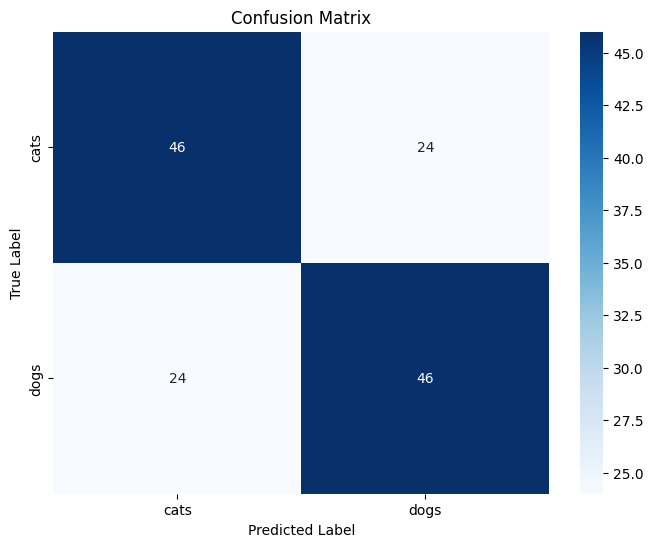

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Confusion matrix
conf_matrix = confusion_matrix(test_labels, y_prediction)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [31]:
print("Classification Report:\n")
print(classification_report(test_labels, y_prediction, target_names=categories))

Classification Report:

              precision    recall  f1-score   support

        cats       0.66      0.66      0.66        70
        dogs       0.66      0.66      0.66        70

    accuracy                           0.66       140
   macro avg       0.66      0.66      0.66       140
weighted avg       0.66      0.66      0.66       140

